<a href="https://colab.research.google.com/github/erdoganali/colab-notebooks/blob/main/Transformer_%2B_FineTune_Kod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [github.com/Frightera](https://github.com/Frightera)
## Altına ref vermediğim çizimler benim tarafımdan hazırlanmıştır.
## Youtube Linki: https://www.youtube.com/watch?v=OtocG4PC_eE

## EmKa GitHub: https://github.com/EmKa-Academy

## RNN vs Transformer

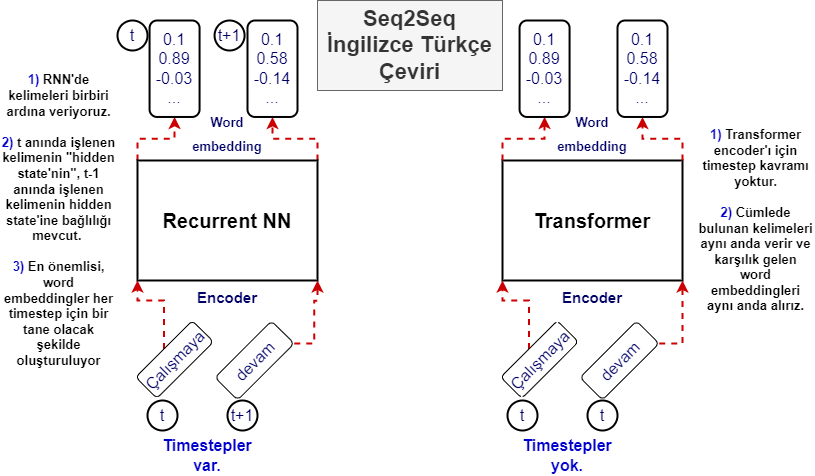

İyi çok güzel, cümleyi komple tek seferde veriyoruz fakat bunu nasıl yapıyor?


## Transformer Mimarisi

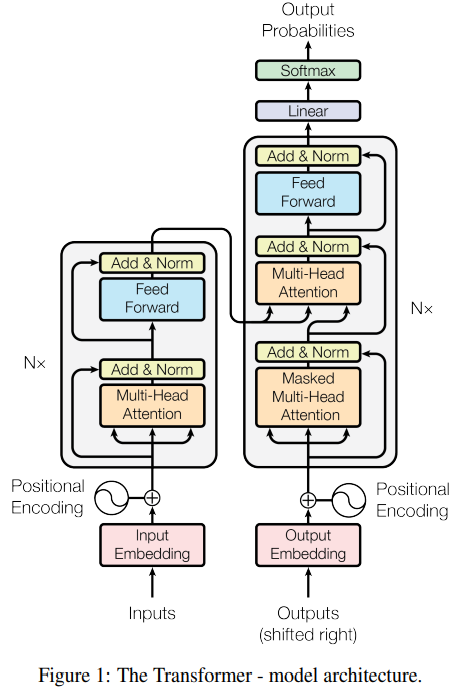

https://arxiv.org/pdf/1706.03762.pdf

## Input Embedding
* Bilgisayarlarla anlaşabilmemiz için onlara insan dilini bir şekilde vektör olarak vermeliyiz, kelimeleri vektörlere çevirirken de yakın anlamlı olan kelimelerinin vektörlerinin arasındaki mesafenin (başka metrikler de olabilir) az olmasını isteriz.

* Örneğin, sözlüğümde 500 kelime varsa bunları 128 boyutlu vektörler olacak ifade edersek (500, 128) şeklinde bir array elde etmiş oluruz.

* Bu vektörlerin bir uzay oluşturduğunu düşünürsek şöyle bir görüntü ortaya çıkacaktır (T-SNE ile 2 boyuta indirgedim 128 --> 2):

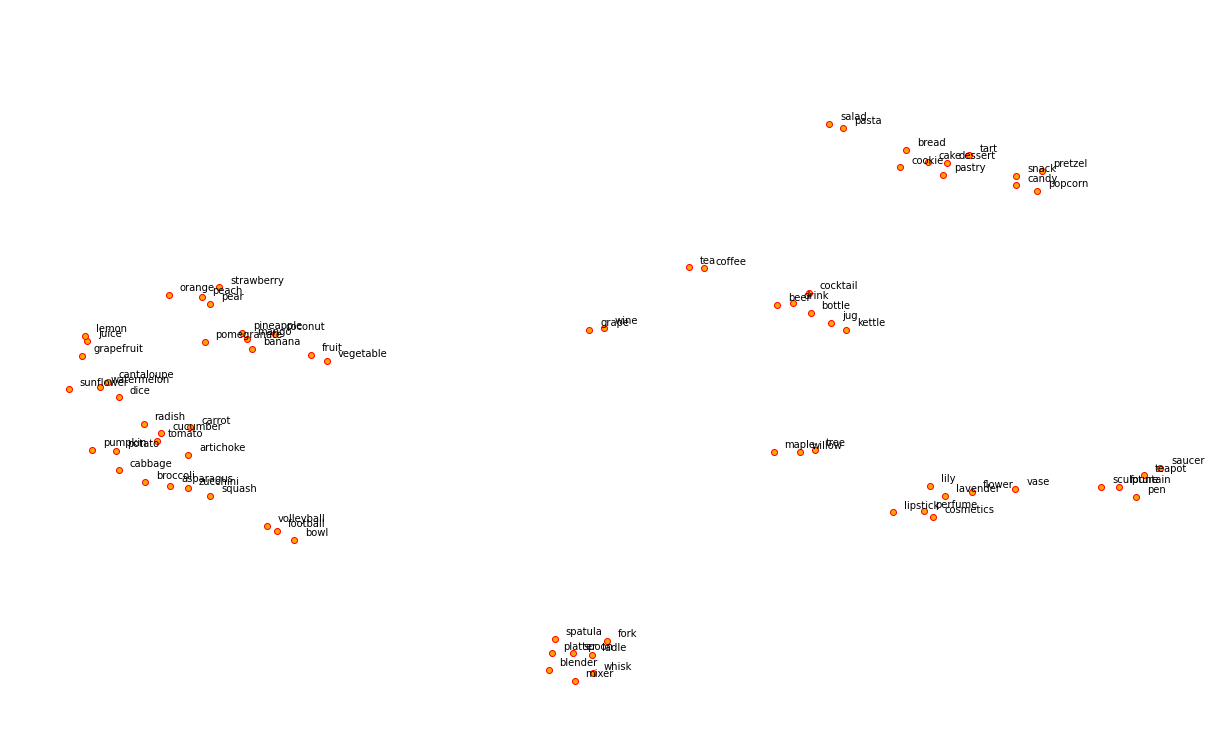

* Görüldüğü üzere yakın kelimelerin vektörleri uzayda birbirine yakındır (her nokta bir kelime vektörünü temsil etmektedir).

* Neticede her kelimeyi bir vektörle ifade etmiş oluruz.
Örnek: -Çalışmak- kelimesi 128 boyutlu bir vektör ile ifade edilebilir.

## Transformerda Tek Başına Input Embedding Yeterli Mi?
Yukarıda da bahsettiğim gibi Transformer mimarisi timestepler kullanmıyor. RNN yapılarında timestepler vardı ve cümleyi sıra halinde işliyorduk. Transformer ile işleri hızlandırmak adına cümlenin tamamıyla birden işlem yapmak isteyince sıra kavramı kaybolmuş oldu.

* Word embedding ile oluşturduğumuz kelime vektörleri bize cümledeki her anlamı çıkarmamıza olanak sağlamıyor. Şu senaryoya bakalım.
  * Çay kenarında çay içtim.

* Cümlede geçen çay kelimelerine baktığımız anda farklı anlamlara geldiğini anlayabiliyoruz fakat diğer bir yandan bu iki kelimenin vektör gösterimleri modeller için farklı anlamlara geliyor mu?

* HAYIR. Çünkü bu iki kelimenin vektör gösterimi aynı, yani bu cümleden iki tane tamamen aynı vektör elde etmiş oluyor.

* Yerlerini modele anlatacak bir yapı geliştirebiliriz. (Positional Encoding)

* Kelimelerin birbirleriyle olan ilişkilerini Transformera anlatacak bir yapı da geliştirebiliriz. (Self-Attention)


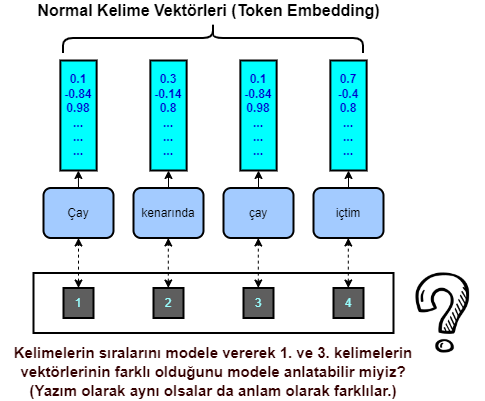

## Positional Embedding

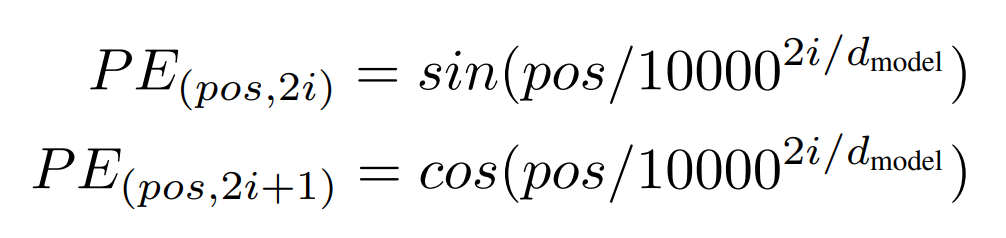

* Attention Is All You Need makalesinde yazarlar bunu sin ve cos fonksiyonları ile vermişlerdir. Göz korkutmaması açısından basitten başlayalım.


### Positional Embedding'i Nasıl Oluşturabiliriz
* Açıklama: Alttaki şemada position vector kısmı kolaylık olsun diye tek sayı olarak gösterilmiş olsa da kelime embeddingleri kadar boyutu vardır. Kelime embeddingleri 128 boyutlu ise position vector de 128 boyutlu olacaktır.

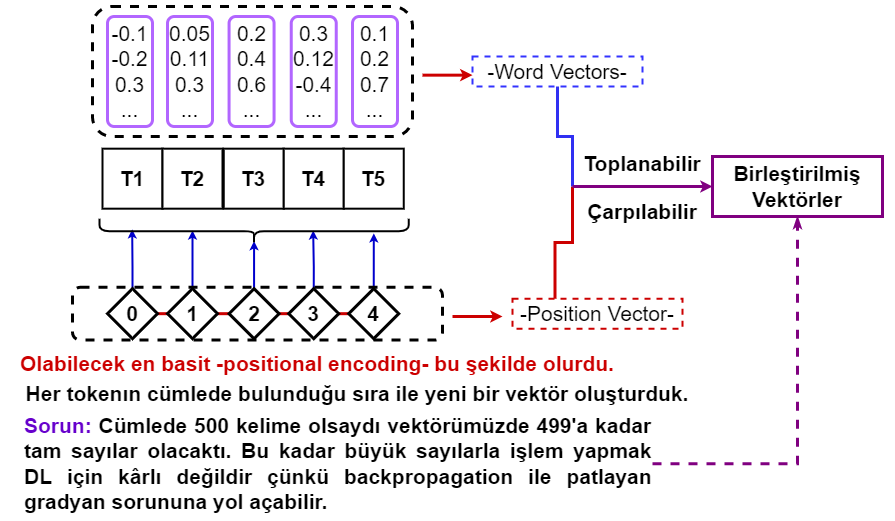

Toplanabilir, çarpılabilir ifadeleri sadece birer örnektir. Önemli olan iki vektörü bir şekilde birleştirmektir ve TOPLAMAK genel bir çözümdür

### Cümleleri Padleyelim veya Uzunları Kırpalım???
Cümle uzunluğunu sabitlediğimizi varsayalım. Verisetimizdeki max. cümle uzunluğu 10 olsun.

* Konum embedding'i oluşturmak için kelime indekslerini kullandık ve gradyanlarla ile ilgili sorun çıkmaması için normalize ettik. 
 * Sonuç olarak bu vektör değerleri 0 ve 1 arasında değerler oldu.

#### Kullanışlı Görünüyor Değil Mi?
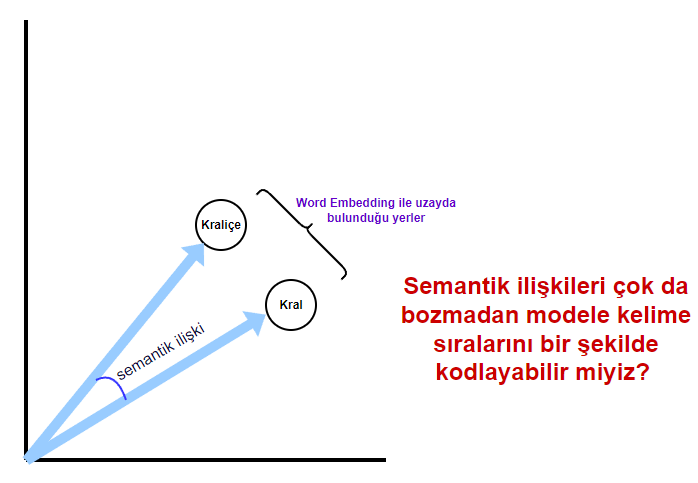



 #### Olası Problemler

 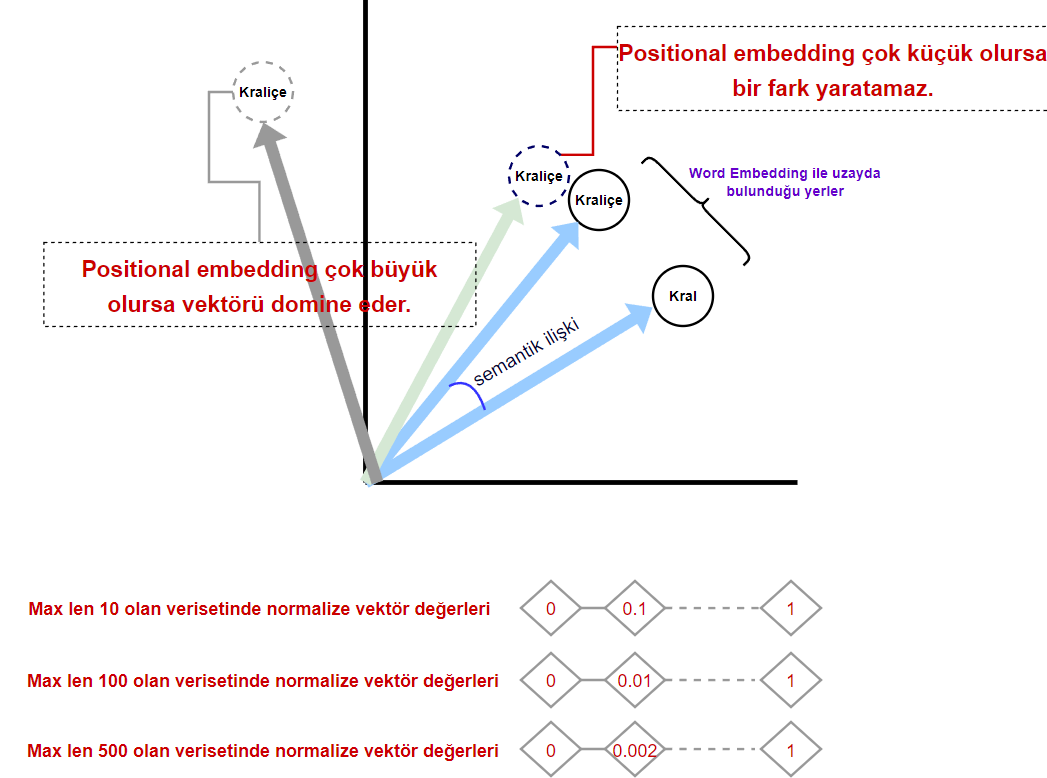

* Bu yaklaşımın ortasını bulacak bir formüle ihtiyacımız var.

#### Yaptığımız Şeyleri Toplamak Gerekirse...
Konum belirten vektörler her kelime için aynı olmalı.

Örnek: 1.indisteki değer 0.1 ise, kelime değiştiği zaman da 0.1 olmalı.

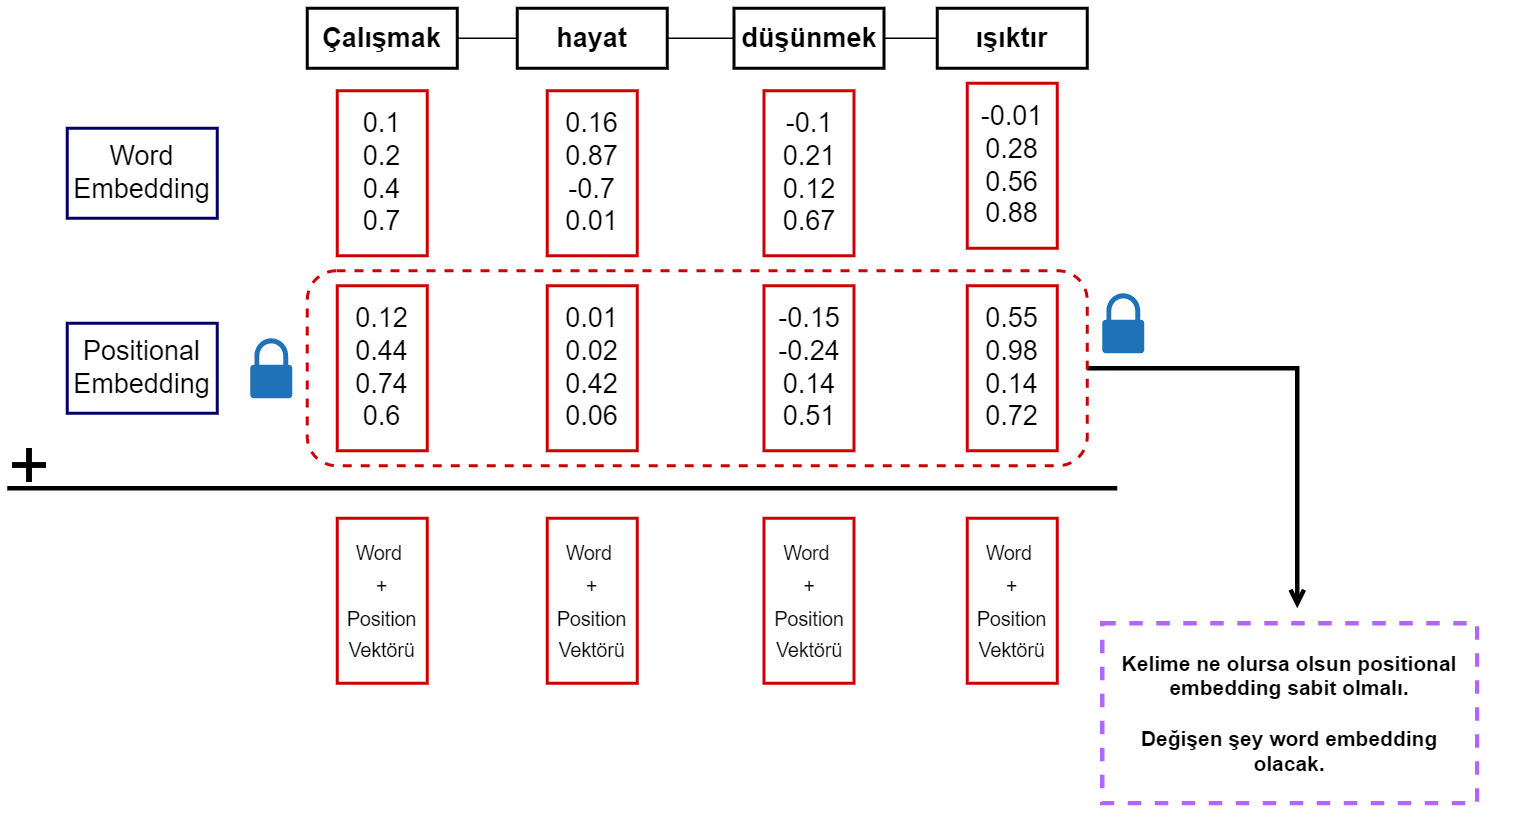

Elde etmemiz gereken positional embedding'leri henüz nasıl elde edeceğimizi kararlaştıramadık.

### Son Yöntem: Frekans Tabanlı Embedding

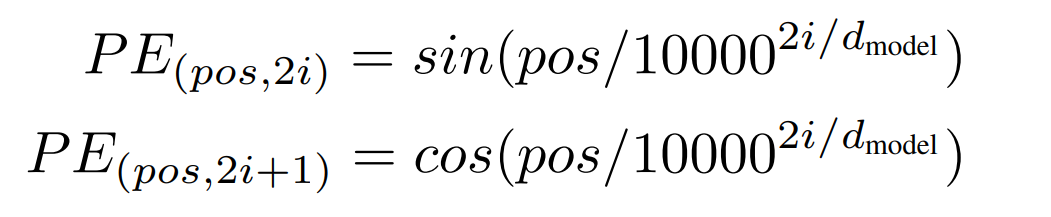

* İlk 2 yaklaşımda gördüğümüz üzere problemler mevcuttu. Bu problemleri yenmek için Attention is All You Need kağıdında yazarlar yukarda gördüğümüz formülü önermişlerdir.

* Buradaki ana fikir, modelin genelleyebileceği özellikler ortaya çıkarıp öğretmektir.

Önerilen formülü açalım:

* d_model: Modelin kullandığı word embedding boyutu (dimension).
* i: Embedding indisi. 
* pos: Kelimenin cümledeki yeri.

In [ ]:
# Ref: https://www.tensorflow.org/text/tutorials/transformer#positional_encoding
# Hazır bir implementasyon kullanalım.
def get_angles(pos, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
    return pos * angle_rates
 
def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)
 
    #Çift indixlere sin uygula; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
 
    # Tek indislere cos uygula; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
 
    pos_encoding = angle_rads[np.newaxis, ...]
 
    return pos_encoding.astype(np.float32)
 
pos = 64
d_model = 128
 
n, d = pos, d_model
pos_encoding = positional_encoding(n, d)
pos_encoding = pos_encoding[0]

#### Bu Yöntem Neden Daha İyi?
Orijinal kağıda bakacak olursak, yazarlar şunu şöylemiştir:

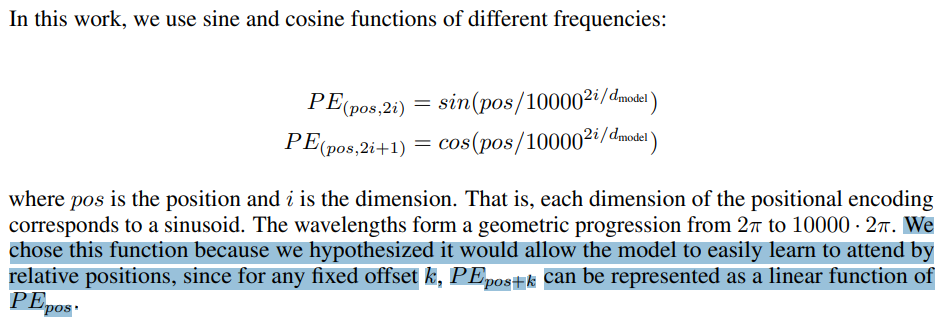

512 boyutlu Positional Embedding vektörünü şu şekilde yazabiliriz:

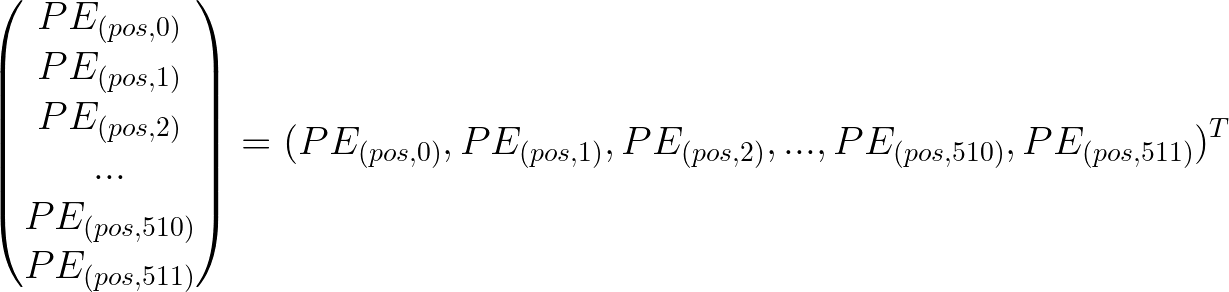

En sondaki transpoz aldığımızı biraz daha açarsak:

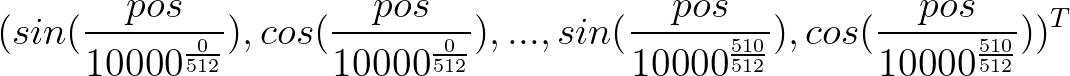

`pos` değerlerini değiştirip, `i` değerlerini sabit tutarsak bu vektörden 2 boyutlu vektörler elde edebiliriz.


```python
# Örnek: pos: 0
pos_encoding[0, 0], pos_encoding[0, 1]
>>> (0.0, 1.0)


# Örnek: pos: 1
pos_encoding[1, 0], pos_encoding[1, 1]
>>> (0.84147096, 0.5403023)


# Bu vektörleri bir scatter plot üzerinde çizersek, aldığımız vektörlerin aslında birim çember üzerinde döndüğünü görebiliriz.
plt.figure(figsize = (16, 16))
i = 0
for pos in range(0, pos):
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    plt.scatter(pos_encoding[pos, 2*i],
                pos_encoding[pos, 2*i + 1],
                alpha = 0.4, color = np.random.rand(3,), linewidth = 10)
```

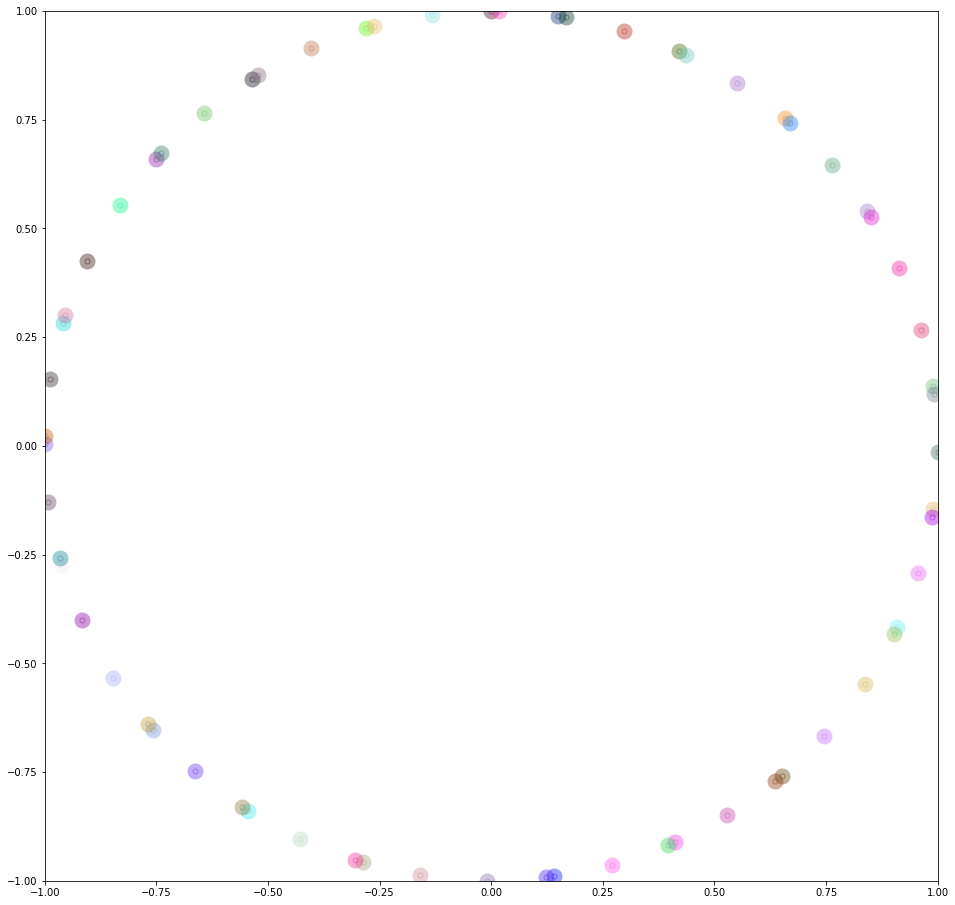

Şu kısma tekradan bakalım: **We chose this function because we hypothesized it would allow the model to easily learn to attend by relative positions, since for any fixed offset k, PE_(pos+k) can be represented as a linear function of PE_pos.**

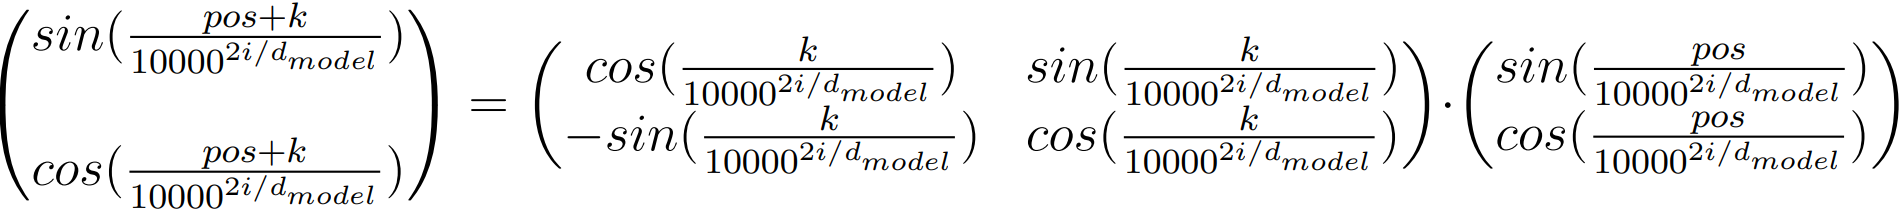

* Rotation Matrix

* i sabit kalırsa, rotation matrix sadece k'ye bağlı olmuş oluyor. POS değiştikçe her nokta, dairelerin derinliğine bağlı olarak farklı frekanslarda POS'un ofsetiyle doğru orantılı olarak dönüyor. Daire ne kadar derinse, frekans o kadar küçük oluyor. 

* Yani sonuç olarak bu tür konumsal kodlamalar Transformer modellerinin bu dairelerin dönüşleri ile kelimelerin konumlarını öğrenmesini sağlamış oluyor. 

* Ayrıca rotation matrix'in her bir öğesinin değerleri -1' ile 1'arasında olduğu için gelen dizi ne kadar uzun olursa olsun büyümeden aynı aralıkta bulunurlar :)

## Attention ve MultiheadAttention Layer

### Attention'a High Level Bakış

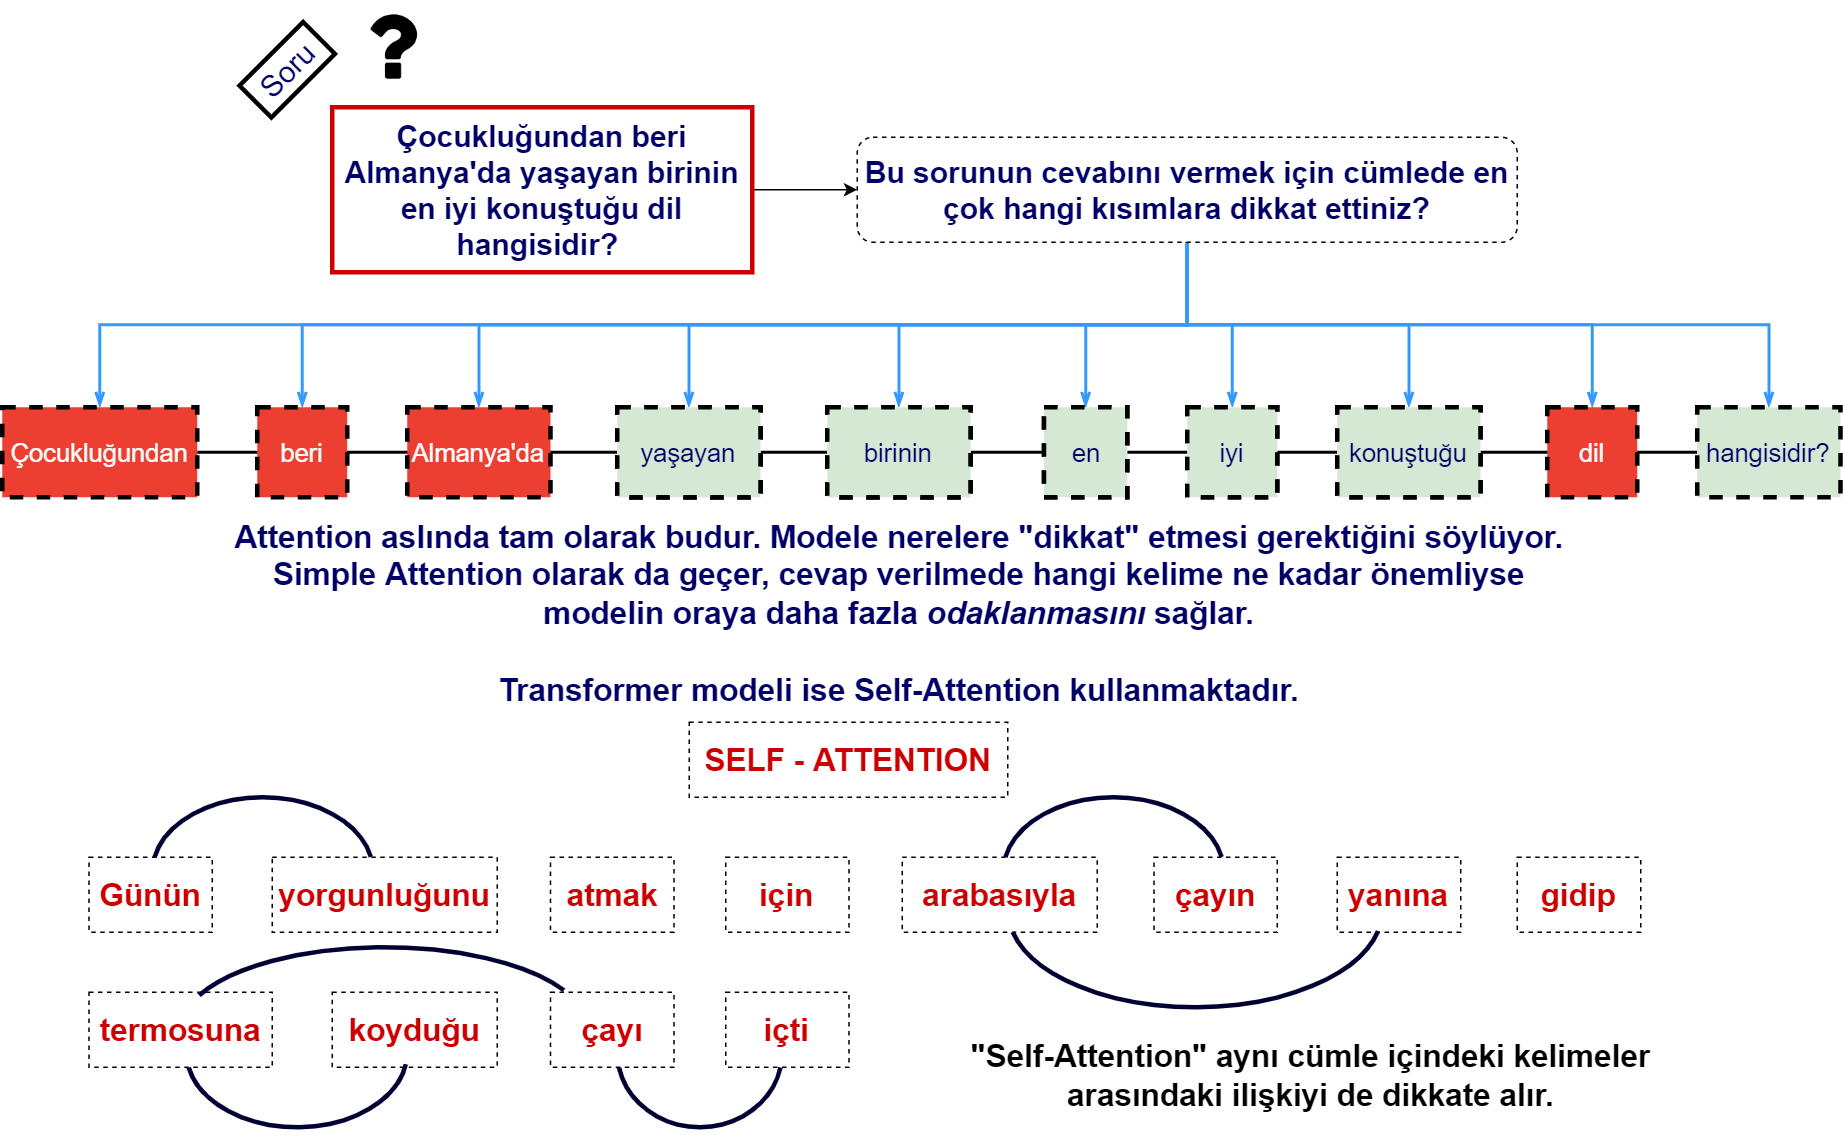

### Query, Key ve Value Kavramları
* Ref: https://stats.stackexchange.com/a/424127

* Query/Key/Value kavramı, sisteme göre değişiklik gösterebilir. 
  * Örneğin, Youtube'da video aradığınızda, arama çubuğundaki metin (query), veritabanındaki bizim metnimizle eşleşen videoların başlığını bir dizi anahtarla (KEY: video başlığı, açıklama vb.) eşleştirir ve ardından sonuçları döndürür. En iyi eşleşen videolar ise VALUES yani değerlerdir.

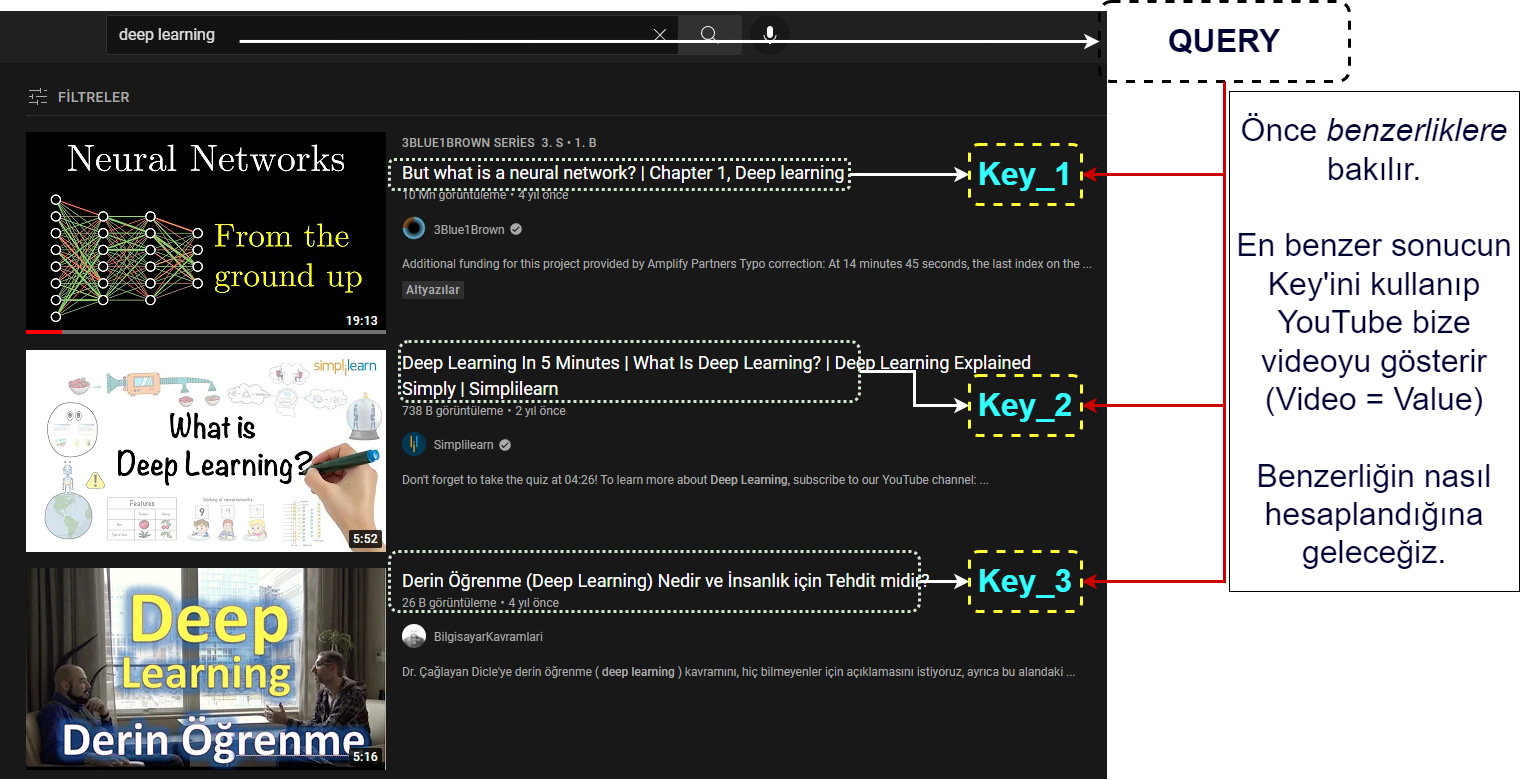

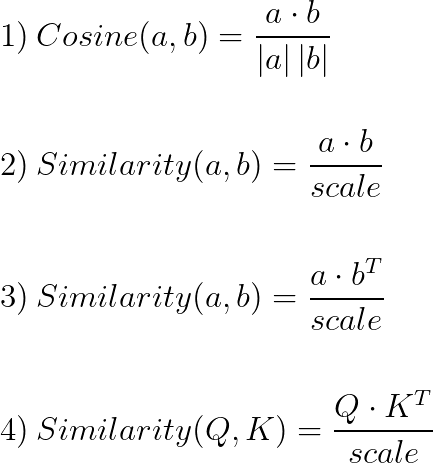

### Multihead Attention Yapısı

#### Attention Head

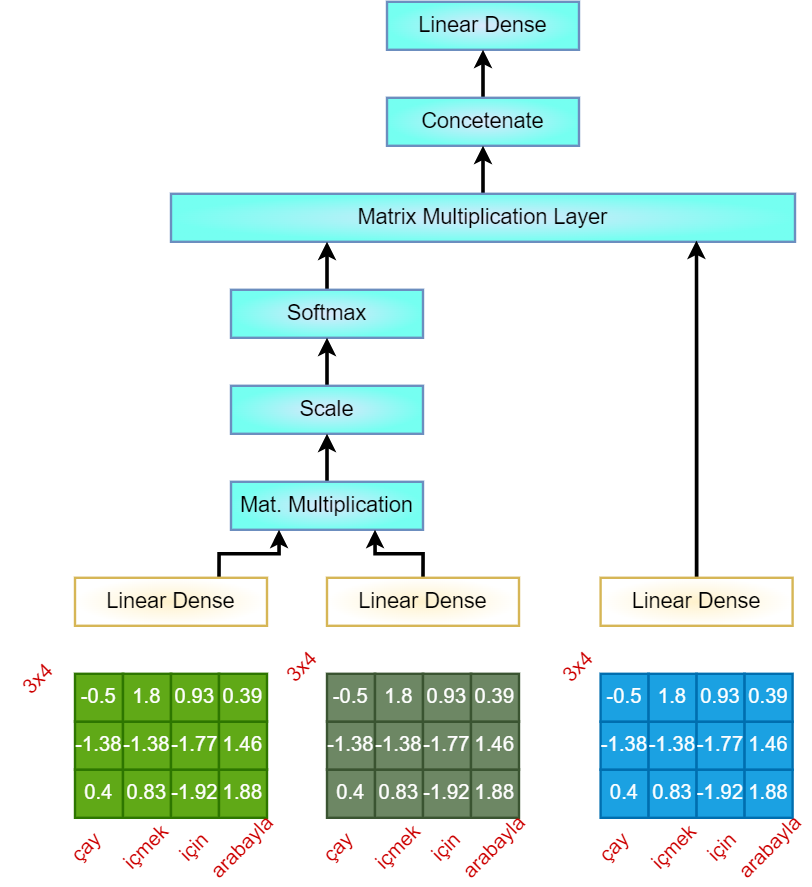

Bir dakika, üç tane input var ve biz bunların hepsine aynı embedding matrisini verdik. Kulağa saçma geliyor biliyorum, onun için şimdilik devam edelim.

Self-Attention kavramı aslında tam olarak burada devreye giriyor. 

 * Self-Attention olmadan modellerin cümle içindeki birbirine benzeyen veya ilişkili olan kelimelerin bilgisini öğrenmesi çok zor olacaktır.

  * Örnek: Dere yatağına yapılan evler … cümlesinde dere ve yatak kelimelerinin vektör gösterimi çok farklı olacaktır fakat self-attention mekanizması ile bunları modele anlatabiliriz.

Linear Layerda 3x2 kısmındaki:
 * 3 --> Embedding matrisinin 3 satır oluşundan
 * 2 --> Linear Dense Layerın 2 unit içermesinden gelmektedir.


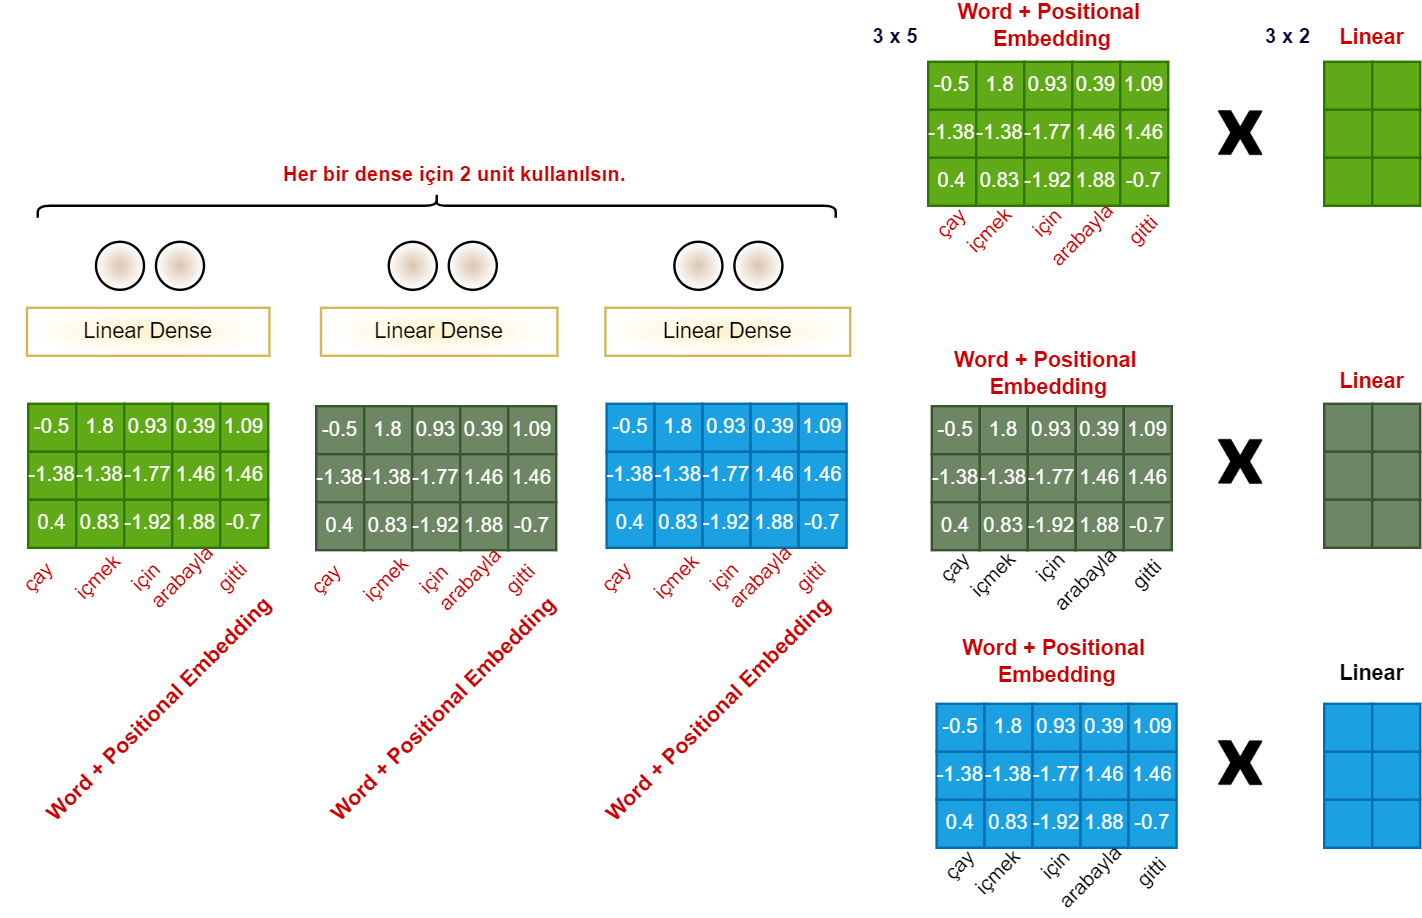

Fakat görüldüğü üzere bu matris çarpımını yapabilmemiz için `Word + Position Embedding` matrislerinin transpozunu almamız gerekiyor.

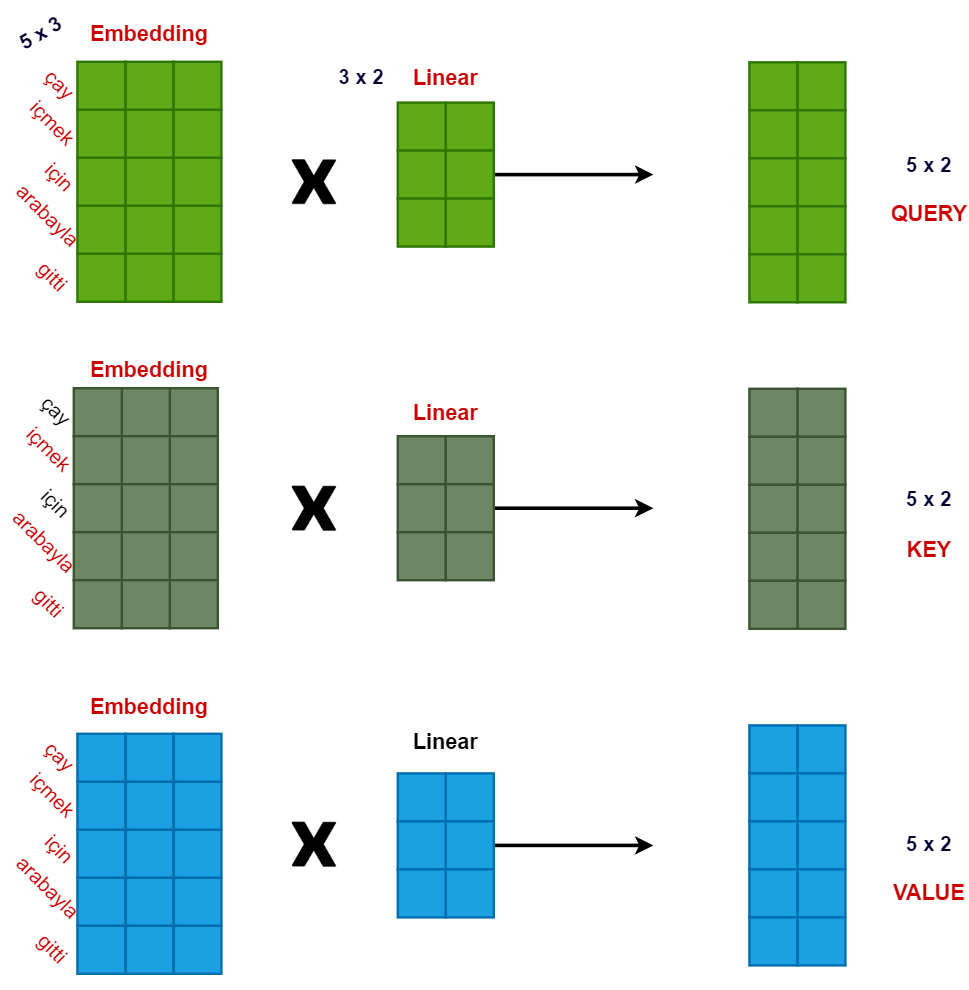

Bir sonraki aşamaya geçelim:

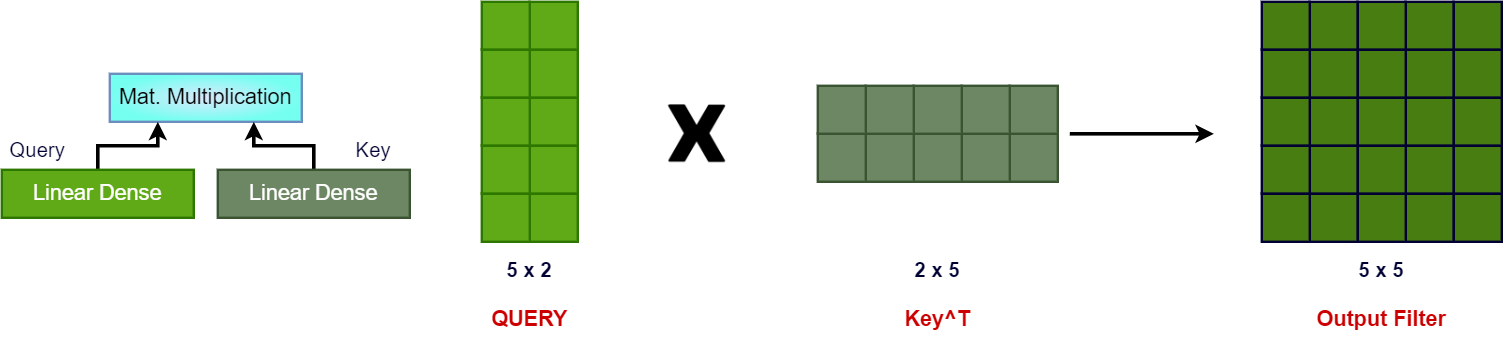

#### Output Filter, Scaling ve Softmax

* Attention is All You Need kağıdında önerilen scale işlemini yapalım. Daha sonra softmax uygulayacağız.

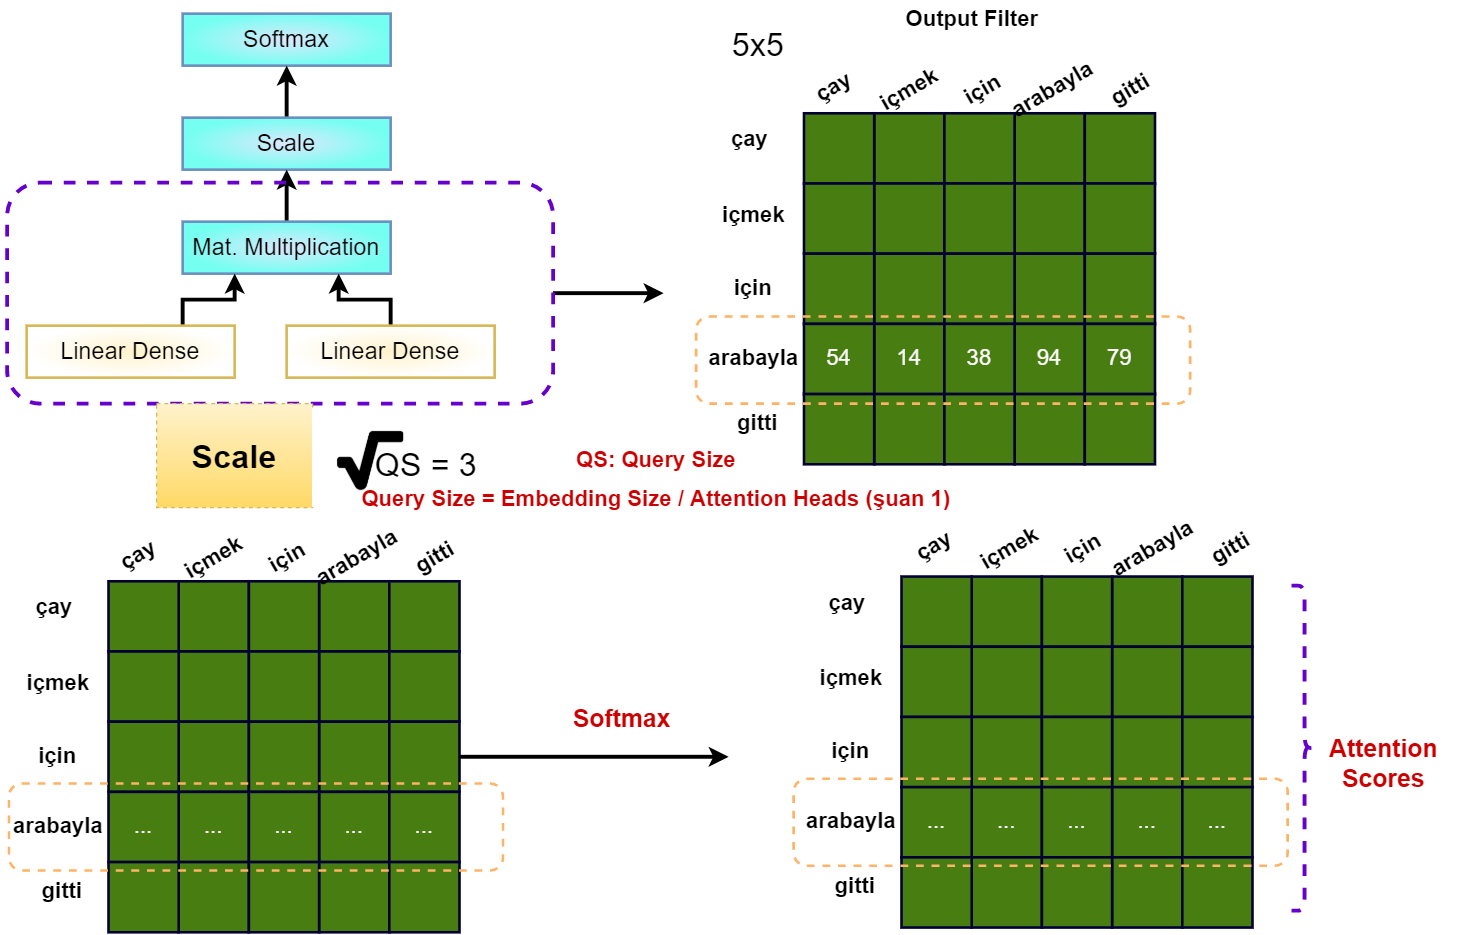


#### Matrix Multiplication Layer

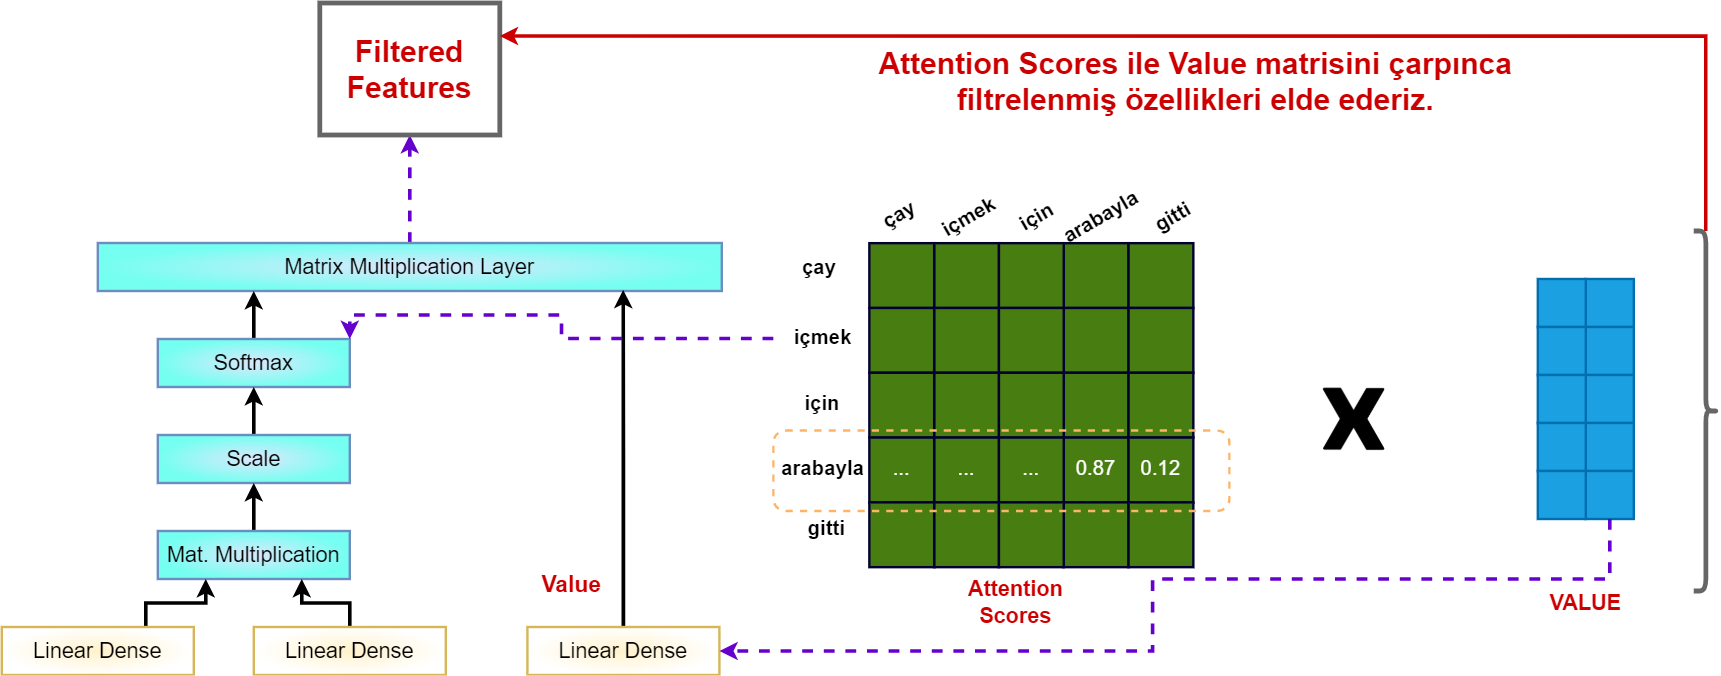

### Multihead Kısmına Geçelim :)
Bu filtrelerden birden çok kullanırsak farklı özellikler öğrenebilir miyiz?

Evet. Transformer mimarileri de bu filtreleri birleştirerek farklı özellikler öğreniyor. Çünkü gerçekte birden çok filtre öğrenilir. Gösterecek olursak:

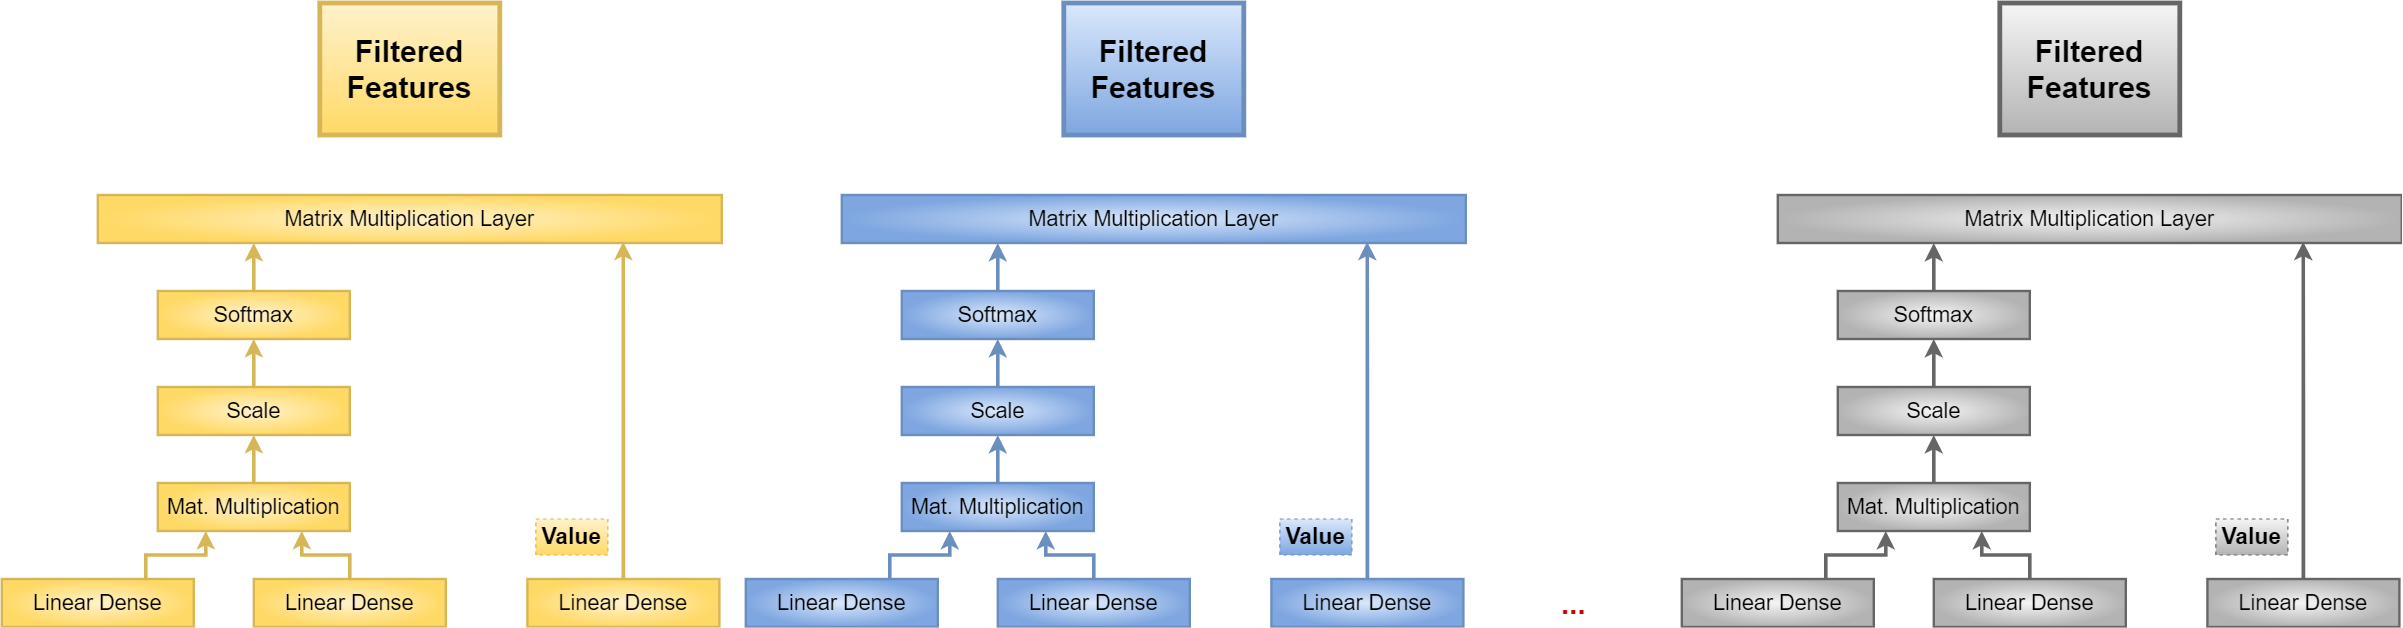

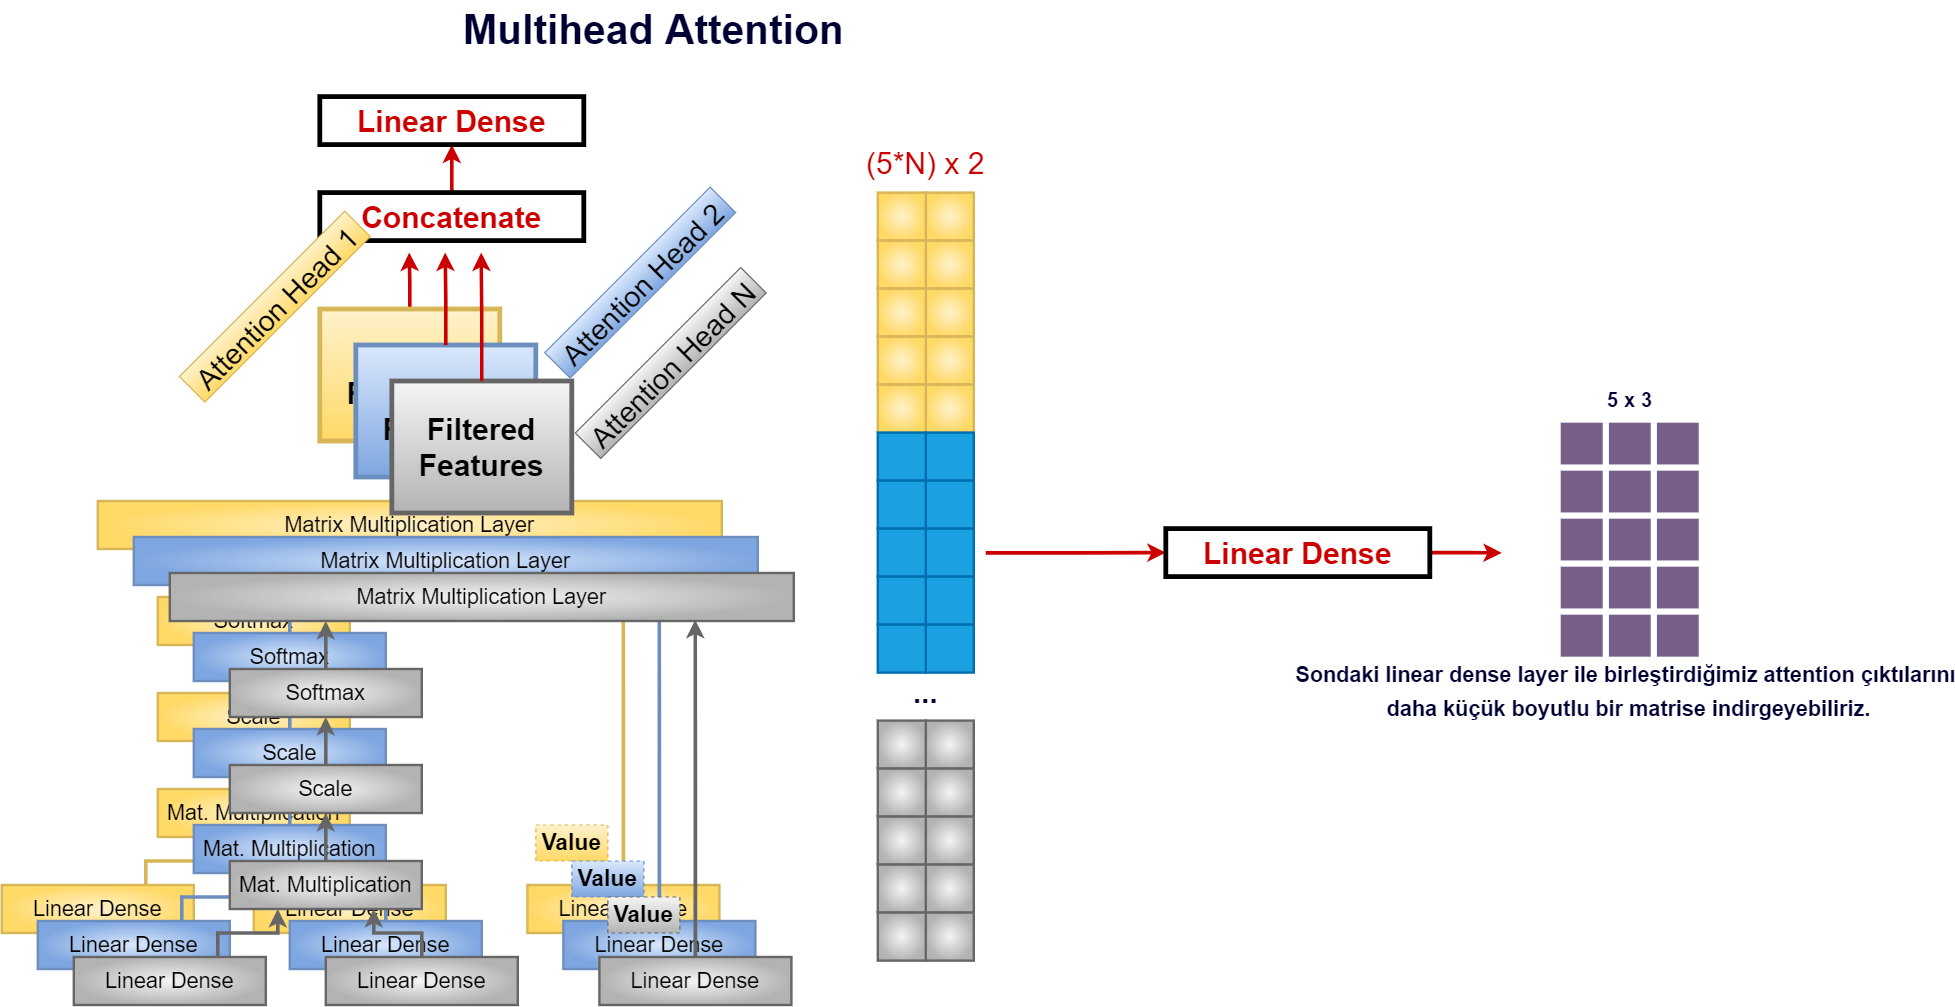

Farklı farklı Attention Headleri birleştirerek aslında Transformer modelinin Self-Attention yardımıyla kelimelerin farklı anlamlarını da öğrenmesini sağlıyoruz. Yani sağlanıyor :)


## Model
Transformer mimarisi aslında Encoder ve Decoder olmak üzere iki bölümden oluşuyor. Fakat biz sınıflandırma yapacağımız için Encoder kısmı yeterli olacak.

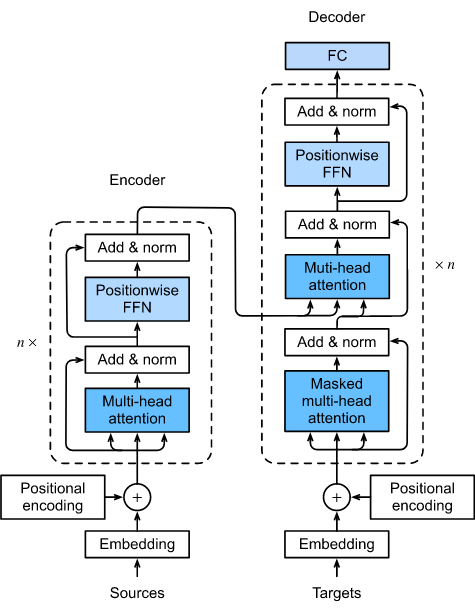

Resim kaynak: https://d2l.ai/chapter_attention-mechanisms/transformer.html#model


In [ ]:
!nvidia-smi

Thu Jun  8 17:53:35 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    47W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install transformers
!pip install transformers accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 83.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 96.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 92.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 12.4 MB/s eta 0:00:00


## DistilBert Fine Tune

In [ ]:
import gzip
import json 

import torch
from transformers import TrainingArguments, Trainer, EarlyStoppingCallback
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# https://nijianmo.github.io/amazon/index.html
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
      yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
      df[i] = d
      i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('/content/drive/MyDrive/Datasets/AMAZON_FASHION_5.json.gz')

In [ ]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Orange'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
1,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Black (3746...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
2,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Gray L...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
3,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue (37867...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
4,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Pink'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN


In [ ]:
df = df[["overall", "reviewText"]]
df = df.dropna()
df.head()

In [ ]:
text = df["reviewText"].to_list()
labels = list((df["overall"] - 1).astype(int))

In [ ]:
labels

In [ ]:
from collections import Counter
Counter(labels)

Counter({4: 2142, 2: 337, 1: 93, 0: 117, 3: 471})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    text, labels, test_size = 0.2, random_state = 812
)

In [ ]:
X_train

In [ ]:
model_name = "distilbert-base-cased"

tokenizer = DistilBertTokenizer.from_pretrained(model_name)

In [ ]:
tokenizer(["hello darkness my old friend"])

{'input_ids': [[101, 19082, 4542, 1139, 1385, 1910, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1]]}

In [ ]:
X_train_tokenized = tokenizer(X_train, 
                              padding=True,
                              truncation=True,
                              max_length=128)

In [ ]:
X_train_tokenized.keys()

dict_keys(['input_ids', 'attention_mask'])

In [ ]:
X_train_tokenized["input_ids"][0]

In [ ]:
X_test_tokenized = tokenizer(X_test, 
                              padding=True,
                              truncation=True,
                              max_length=128)

In [ ]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, tokenized_sentences, labels):
        self.tokenized_sentences = tokenized_sentences
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(value[idx]) for key, value in self.tokenized_sentences.items()}
        item["labels"] = torch.tensor(self.labels[idx])

        return item
        
    def __len__(self):
        return len(self.labels)

In [ ]:
train_ds = Dataset(X_train_tokenized, y_train)
test_ds = Dataset(X_test_tokenized, y_test)

In [ ]:
model = DistilBertForSequenceClassification.from_pretrained(
    model_name, num_labels = 5
)

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'pre_classifi

In [ ]:
arguments = TrainingArguments(
    output_dir = "output",
    evaluation_strategy = "epoch",

    per_device_train_batch_size = 128,
    per_device_eval_batch_size = 128,

    learning_rate = 1e-4,
    optim = "adagrad",

    num_train_epochs = 10,
    weight_decay = 1e-4,

    load_best_model_at_end = True,

    logging_strategy = "epoch",
    save_strategy = "epoch"
)

In [ ]:
import numpy as np

In [ ]:
random_arr = np.random.rand(5)
random_arr

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864])

In [ ]:
np.argmax(random_arr)

1

In [ ]:
def compute_metrics(preds_label):
    predictions, labels = preds_label

    predicted_class = np.argmax(predictions, axis=-1)

    f1 = f1_score(labels, predicted_class, average = "macro")
    accuracy = accuracy_score(labels, predicted_class)

    return {"f1": f1, "acc": accuracy}


In [ ]:
trainer = Trainer(
    model=model,
    args=arguments,
    train_dataset = train_ds,
    eval_dataset = test_ds,
    callbacks = [EarlyStoppingCallback(early_stopping_patience = 3)],
    compute_metrics = compute_metrics
)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,F1,Acc
1,0.937000,0.649140,0.247588,0.723101
2,0.558200,0.414474,0.446797,0.838608
3,0.359700,0.264470,0.584296,0.916139
4,0.243500,0.189058,0.660989,0.933544
5,0.174400,0.141983,0.929347,0.974684


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 1>:1                                                                              │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/trainer.py:1645 in train                    │
│                                                                                                  │
│   1642 │   │   inner_training_loop = find_executable_batch_size(                                 │
│   1643 │   │   │   self._inner_training_loop, self._train_batch_size, args.auto_find_batch_size  │
│   1644 │   │   )                                                                                 │
│ ❱ 1645 │   │   return inner_training_loop(                                                       │
│   1646 │   │   │   args=args,                                                                    │
│   1647 │   │   │   resume_from_checkpoint=resume_from_checkpoint,                                │
│   1648 │   │   │   trial=trial,                                                                  │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/trainer.py:1929 in _inner_training_loop     │
│                                                                                                  │
│   1926 │   │   │   │   │   self.control = self.callback_handler.on_step_begin(args, self.state,  │
│   1927 │   │   │   │                                                                             │
│   1928 │   │   │   │   with self.accelerator.accumulate(model):                                  │
│ ❱ 1929 │   │   │   │   │   tr_loss_step = self.training_step(model, inputs)                      │
│   1930 │   │   │   │                                                                             │
│   1931 │   │   │   │   if (                                                                      │
│   1932 │   │   │   │   │   args.logging_nan_inf_filter                                           │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/trainer.py:2761 in training_step            │
│                                                                                                  │
│   2758 │   │   │   with amp.scale_loss(loss, self.optimizer) as scaled_loss:                     │
│   2759 │   │   │   │   scaled_loss.backward()                                                    │
│   2760 │   │   else:                                                                             │
│ ❱ 2761 │   │   │   self.accelerator.backward(loss)                                               │
│   2762 │   │                                                                                     │
│   2763 │   │   return loss.detach() / self.args.gradient_accumulation_steps                      │
│   2764                                                                                           │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:1821 in backward               │
│                                                                                                  │
│   1818 │   │   elif self.scaler is not None:                                                     │
│   1819 │   │   │   self.scaler.scale(loss).backward(**kwargs)                                    │
│   1820 │   │   else:                                                                             │
│ ❱ 1821 │   │   │   loss.backward(**kwargs)                                                       │
│   1822 │                                                   

In [ ]:
trained_model = trainer.model

In [ ]:
trained_model.state_dict()

In [ ]:
from torch.quantization import quantize_dynamic

In [ ]:
quantized_model = quantize_dynamic(trained_model, dtype = torch.qint8)

In [ ]:
quantized_model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): DynamicQuantizedLinear(in_features=768, out_features=768, dtype=torch.qint8, qscheme=torch.per_tensor_affine)
            (k_lin): DynamicQuantizedLinear(in_features=768, out_features=768, dtype=torch.qint8, qscheme=torch.per_tensor_affine)
            (v_lin): DynamicQuantizedLinear(in_features=768, out_features=768, dtype=torch.qint8, qscheme=torch.per_tensor_affine)
            (out_lin): DynamicQuantizedLinear(in_features=768, out_feature

In [ ]:
torch.save(quantized_model.state_dict(), "quantized_model_save2") # 127MB